# Importinng importent Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [73]:
#load data set
df = pd.read_csv('Advertising.csv')
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [74]:
#drop unwanted columns because that are not use for modal building
df = df.drop(columns=['Unnamed: 0'],axis=1)

# Know about data informations


In [75]:
#shap of data
df.shape

(200, 4)

In [76]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [81]:
# we clearly see that in radio min value is zero. so we have to deal with zero value 
# this is very simple so i am using
df['radio'] = df['radio'].replace(0,df['radio'].mean())

In [83]:
#now it is ok
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.380320,30.554000,14.022500
std,85.854236,14.754473,21.778621,5.217457
min,0.700000,0.300000,0.300000,1.600000
25%,74.375000,10.075000,12.750000,10.375000
50%,149.750000,23.282000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Chacking correlation feature with target
1.saprate feature and label
2.Correlation between feature vs feature by using heatmap
3.Correlation between feature vs label by using .corr mathod

In [94]:
label = df['sales']
feature = df.drop(columns=['sales'])

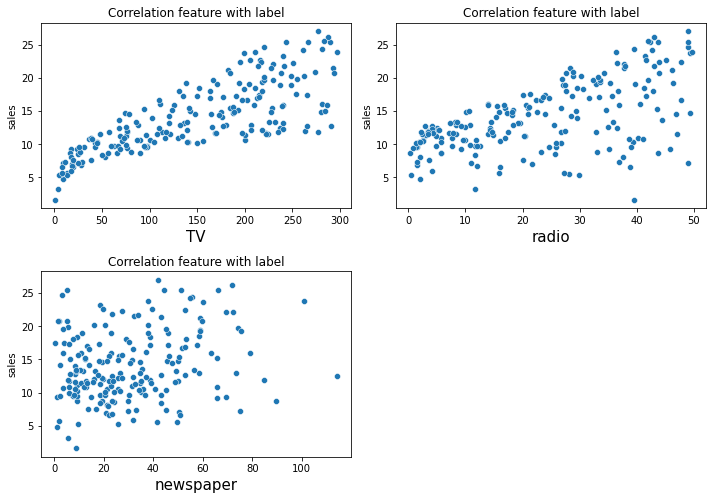

In [90]:
#scatter plot
plt.figure(figsize=(10,10),facecolor='white')
plot=1
for column in feature:
    if plot<=3:
        plt.subplot(3,2,plot)
        sns.scatterplot(feature[column],label)
        plt.title("Correlation feature with label")
        plt.xlabel(column,fontsize =15)
    plot+=1
plt.tight_layout()
    

In [95]:
#clearly see that newspaper is not very good related with label so we can drop that column.
#also we can say that newspaper is not impacted on sales.
feature=feature.drop(columns=['newspaper'])

In [96]:
feature.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


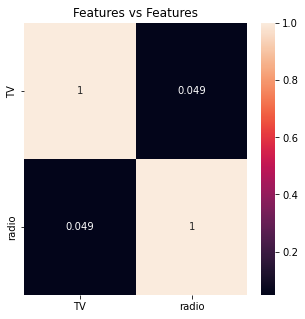

In [99]:
#now chack correlation between feature vs feature using heatmap
plt.figure(figsize=(5,5),facecolor='white')
sns.heatmap(feature.corr(),annot=True)
plt.title("Features vs Features")
plt.show()


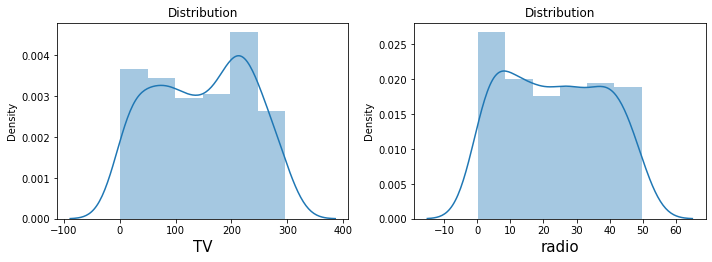

In [102]:
#data distribution
#distplot
plt.figure(figsize=(10,10),facecolor='white')
plot=1
for column in feature:
    if plot<=3:
        plt.subplot(3,2,plot)
        sns.distplot(feature[column])
        plt.title("Distribution")
        plt.xlabel(column,fontsize =15)
    plot+=1
plt.tight_layout()

In [103]:
#Now chack skweness
feature.skew().sort_values(ascending=False)
#we can cansider this skewness because range of skewness is (+0.5 to -0.5)

radio    0.091961
TV      -0.069853
dtype: float64

In [106]:
#but if we want to more clearity so we use power transformation for overcome skewness.
from sklearn.preprocessing import power_transform
feature_new = power_transform(feature)
feature_new = pd.DataFrame(feature_new,columns=['TV','Radio'])

In [107]:
#again chack skewness
feature_new.skew().sort_values(ascending=False)

Radio   -0.046842
TV      -0.058889
dtype: float64

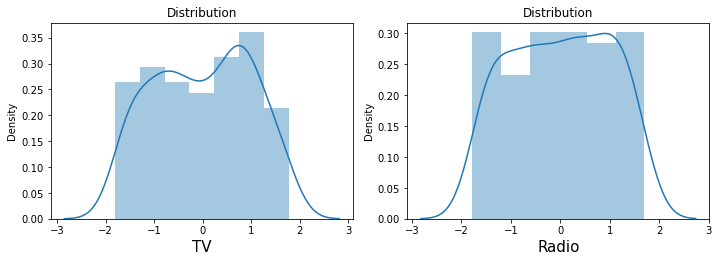

In [108]:
#data distribution
#distplot
plt.figure(figsize=(10,10),facecolor='white')
plot=1
for column in feature_new:
    if plot<=3:
        plt.subplot(3,2,plot)
        sns.distplot(feature_new[column])
        plt.title("Distribution")
        plt.xlabel(column,fontsize =15)
    plot+=1
plt.tight_layout()

# Everything is good so we can build modal

In [109]:
# Import model building libraries

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [110]:
sc = StandardScaler()
x_scaled = sc.fit_transform(feature_new)

In [111]:
#now split data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,label,random_state=50,test_size=0.25)

In [112]:
def Print_Score(self,x_train,x_test,y_train,y_test,train=True):
    if train==True:
        modal=self.fit(x_train,y_train)
        y_train_pre=modal.predict(x_train)
        print("======================Train Score==================")
        
        print("Score of train data is :",r2_score(y_train,y_train_pre))
        print("Mean squared error :",mean_squared_error(y_train,y_train_pre))
        print("Mean absolute error :",mean_absolute_error(y_train,y_train_pre))
        
    
    if train==False:
        modal=self.fit(x_train,y_train)
        y_pre_test= modal.predict(x_test)
        
        print("======================Test Score==================")
        
        print("Score of test data is :",r2_score(y_test,y_pre_test))
        print("Mean squared error :",mean_squared_error(y_test,y_pre_test))
        print("Mean absolute error :",mean_absolute_error(y_test,y_pre_test))
        
        

# LinearRegression

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
log_Reg = LinearRegression()

In [115]:
Print_Score(log_Reg,x_train,x_test,y_train,y_test,train=True)

======================Train Score==================
Score of train data is : 0.8984621253360358
Mean squared error : 3.0395800972996803
Mean absolute error : 1.329832721634351


In [117]:
Print_Score(log_Reg,x_train,x_test,y_train,y_test,train=False)

======================Test Score==================
Score of test data is : 0.8808867239760452
Mean squared error : 2.085395214566657
Mean absolute error : 1.1160323697670795


# Knn Regressor

In [116]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()

In [118]:
Print_Score(knn_reg,x_train,x_test,y_train,y_test,train=True)

======================Train Score==================
Score of train data is : 0.9823889404871857
Mean squared error : 0.5271946666666667
Mean absolute error : 0.4693333333333334


In [119]:
Print_Score(knn_reg,x_train,x_test,y_train,y_test,train=False)

======================Test Score==================
Score of test data is : 0.9821499887135142
Mean squared error : 0.3125120000000003
Mean absolute error : 0.44320000000000026


# DecisionTreeRegressor

In [120]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()


In [121]:
Print_Score(decision_tree,x_train,x_test,y_train,y_test,train=True)

======================Train Score==================
Score of train data is : 1.0
Mean squared error : 0.0
Mean absolute error : 0.0


In [123]:
Print_Score(decision_tree,x_train,x_test,y_train,y_test,train=False)

======================Test Score==================
Score of test data is : 0.9569559936722569
Mean squared error : 0.7536000000000004
Mean absolute error : 0.684


# AdaBoostRegressor

In [124]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor()

In [125]:
Print_Score(ada_boost,x_train,x_test,y_train,y_test,train=True)

======================Train Score==================
Score of train data is : 0.979019185202475
Mean squared error : 0.6280697453510959
Mean absolute error : 0.6551157399315215


In [126]:
Print_Score(ada_boost,x_train,x_test,y_train,y_test,train=False)

======================Test Score==================
Score of test data is : 0.9579279608198953
Mean squared error : 0.7365831257601085
Mean absolute error : 0.6557009903029425


# GradientBoostingRegressor

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt = GradientBoostingRegressor()

In [128]:
Print_Score(gbdt,x_train,x_test,y_train,y_test,train=True)

======================Train Score==================
Score of train data is : 0.9986582416479068
Mean squared error : 0.04016611531318067
Mean absolute error : 0.1501386432060174


In [129]:
Print_Score(gbdt,x_train,x_test,y_train,y_test,train=False)

======================Test Score==================
Score of test data is : 0.9832605809719138
Mean squared error : 0.2930681238989392
Mean absolute error : 0.3948329321895779


# XGBRegressor

In [130]:
from xgboost import XGBRegressor
xgb_reg= XGBRegressor()

In [131]:
Print_Score(xgb_reg,x_train,x_test,y_train,y_test,train=True)

======================Train Score==================
Score of train data is : 0.9999988381339746
Mean squared error : 3.4780960879566434e-05
Mean absolute error : 0.004412452220916819


In [138]:
Print_Score(xgb_reg,x_train,x_test,y_train,y_test,train=False)

======================Test Score==================
Score of test data is : 0.9754554400211156
Mean squared error : 0.4297179091381553
Mean absolute error : 0.48583270263671885


# SVR

In [135]:
from sklearn.svm import SVR
svr = SVR()

In [136]:
Print_Score(svr,x_train,x_test,y_train,y_test,train=True)

======================Train Score==================
Score of train data is : 0.9642100007177894
Mean squared error : 1.0713890738859975
Mean absolute error : 0.5785888774805049


In [137]:
Print_Score(svr,x_train,x_test,y_train,y_test,train=False)

======================Test Score==================
Score of test data is : 0.9746260067606531
Mean squared error : 0.4442393479727563
Mean absolute error : 0.40751706628682627


# RandomForestRegressor

In [157]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()

In [158]:
Print_Score(random_forest_reg,x_train,x_test,y_train,y_test,train=False)

======================Test Score==================
Score of test data is : 0.9791440411467799
Mean squared error : 0.36513912000000237
Mean absolute error : 0.440120000000001


In [159]:
Print_Score(random_forest_reg,x_train,x_test,y_train,y_test,train=True)

======================Train Score==================
Score of train data is : 0.9969103628979474
Mean squared error : 0.09248961999999956
Mean absolute error : 0.2272733333333327


# we are seeing that RandomForestRegressor is giving good score with very low error so we concider RandomForestRegressor as the best modal for this data set.  but before that we have to chack cross value validation.

In [162]:
# Cross Validation Scores

from sklearn.model_selection import cross_val_score

print("Random Forest Regressor : ",cross_val_score(random_forest_reg,x_scaled,label,cv=5,scoring='r2').mean())
print("K-Neighhors Regressor   : ",cross_val_score(knn_reg,x_scaled,label,cv=5,scoring='r2').mean())
print("Decision Tree Regressor :",cross_val_score(decision_tree,x_scaled,label,cv=5,scoring='r2').mean())
print("Linear Regression       : ",cross_val_score(log_Reg,x_scaled,label,cv=5,scoring='r2').mean())
print("Support Vector Regressor       : ",cross_val_score(svr,x_scaler,label,cv=5,scoring='r2').mean())
print("AdaBoostRegressor :",cross_val_score(ada_boost,x_scaled,label,cv=5,scoring='r2').mean())
print("GradientBoostingRegressor :",cross_val_score(gbdt,x_scaled,label,cv=5,scoring='r2').mean())
print("XGBRegressor :",cross_val_score(xgb_reg,x_scaled,label,cv=5,scoring='r2').mean())


Random Forest Regressor :  0.9760671340618394
K-Neighhors Regressor   :  0.966042007242583
Decision Tree Regressor : 0.9523873104207435
Linear Regression       :  0.8877055950335155
Support Vector Regressor       :  0.900144484350492
AdaBoostRegressor : 0.9496755984001476
GradientBoostingRegressor : 0.9360515546355316
XGBRegressor : 0.9681076959469674


# Now we can use hyperperametter tunning
1.GridSearchCV
2.RandomizedSearchCV

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [168]:
RandomForestRegressor()
perametter = {'n_estimators':[100,105],
               'min_samples_split':[1,2,3],
               'min_samples_leaf':[1,2,3],
                'max_depth':[1,2,3,4],
                 'criterion':['mse','mae']}


In [169]:
gride_serch_cv = GridSearchCV(estimator=random_forest_reg,param_grid=perametter)

In [170]:
gride_serch_cv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 105]})

In [172]:
#chack best perametter
gride_serch_cv.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [176]:
#Now build again modal 
random_forest_reg_hypertunning =RandomForestRegressor(criterion='mse',max_depth=4,min_samples_split=2,min_samples_leaf=2,n_estimators=100)

In [177]:
Print_Score(random_forest_reg_hypertunning,x_train,x_test,y_train,y_test,train=True)

======================Train Score==================
Score of train data is : 0.9838098050353924
Mean squared error : 0.4846604732341099
Mean absolute error : 0.5223380584795106


In [178]:
Print_Score(random_forest_reg_hypertunning,x_train,x_test,y_train,y_test,train=False)

======================Test Score==================
Score of test data is : 0.9673744952133999
Mean squared error : 0.5711963756341852
Mean absolute error : 0.5995730610927942


# we consider old RandomForestRegressor because that has gave good score and low error

save modal.

In [179]:
import joblib

joblib.dump(random_forest_reg, "Final_RandomForest_Model.pkl")

['Final_RandomForest_Model.pkl']